In [ ]:
# Import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, mean_squared_log_error

In [ ]:
# Load data
df = pd.read_csv('INTC.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-01-02,45.959999,47.470001,45.770000,47.080002,41.513241,18774600
1,2019-01-03,46.150002,46.279999,44.389999,44.490002,39.229465,32267300
2,2019-01-04,45.840000,47.570000,45.540001,47.220001,41.636677,35447300
3,2019-01-07,47.099998,48.000000,46.750000,47.439999,41.830650,22736800
4,2019-01-08,47.799999,48.029999,46.779999,47.740002,42.095181,22749200
...,...,...,...,...,...,...,...
1079,2023-04-17,31.950001,32.639999,31.770000,32.139999,32.139999,29601100
1080,2023-04-18,32.430000,32.459999,31.780001,31.830000,31.830000,26041400
1081,2023-04-19,31.100000,31.520000,31.080000,31.150000,31.150000,25746600
1082,2023-04-20,30.760000,31.250000,30.709999,30.860001,30.860001,30255100


In [ ]:
# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Set the 'Date' column as the index value
df.set_index('Date', inplace=True)

In [ ]:
# Show DataFrame
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,45.959999,47.470001,45.770000,47.080002,41.513241,18774600
2019-01-03,46.150002,46.279999,44.389999,44.490002,39.229465,32267300
2019-01-04,45.840000,47.570000,45.540001,47.220001,41.636677,35447300
2019-01-07,47.099998,48.000000,46.750000,47.439999,41.830650,22736800
2019-01-08,47.799999,48.029999,46.779999,47.740002,42.095181,22749200
...,...,...,...,...,...,...
2023-04-17,31.950001,32.639999,31.770000,32.139999,32.139999,29601100
2023-04-18,32.430000,32.459999,31.780001,31.830000,31.830000,26041400
2023-04-19,31.100000,31.520000,31.080000,31.150000,31.150000,25746600


In [ ]:
# Descriptive Statistical
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1084.000000,1084.000000,1084.000000,1084.000000,1084.000000,1.084000e+03
mean,48.699363,49.310415,48.104982,48.709797,45.224860,3.131073e+07
std,10.536348,10.628043,10.439233,10.536673,9.059149,1.619271e+07
min,24.730000,25.120001,24.590000,24.900000,24.408895,6.313200e+06
25%,45.177499,45.745000,44.549999,45.020000,41.560767,2.053605e+07
50%,50.524999,51.195000,49.990000,50.610001,46.553512,2.807305e+07
75%,56.345000,56.719999,55.709999,56.082501,51.975154,3.713008e+07
max,68.199997,69.290001,67.309998,68.470001,63.608192,1.822699e+08


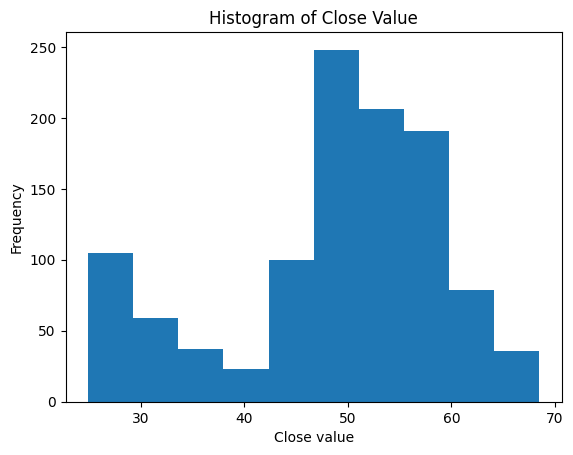

In [ ]:
#  Draw a histogram
plt.hist(df['Close'])

# Set label and title
plt.xlabel('Close value')
plt.ylabel('Frequency')
plt.title('Histogram of Close Value')

# Display histogram
plt.show()

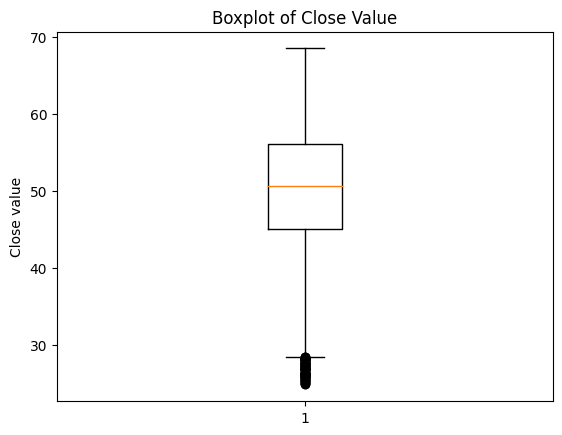

In [ ]:
# Draw a boxplot
plt.boxplot(df.Close)

# Set label and title
plt.title("Boxplot of Close Value")
plt.ylabel("Close value")

# Hiển thị biểu đồ
plt.show()

In [ ]:
# Select the Close column as the dependent variable
df_Close = df[['Close']]
df_Close = df_Close.reset_index(drop=True)

In [ ]:
# Split the data into train, test, and validate sets in a ratio of 7:2:1
train_size = int(0.7 * len(df_Close))
test_size = int(0.2 * len(df_Close))
val_size = len(df_Close) - train_size - test_size

train_data = df_Close[: train_size]
test_data = df_Close[train_size : train_size + test_size]
val_data = df_Close[train_size + test_size :]

In [ ]:
# Training Process
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])

In [ ]:
# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [ ]:
# Testing process
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])
y_pred = model.predict(x_test)

In [ ]:
# Evaluate the accuracy of test
test_mae = mean_absolute_error(y_test, y_pred)
test_mape = mean_absolute_percentage_error(y_test, y_pred)
test_mse = mean_squared_error(y_test, y_pred)
test_rmse = np.sqrt(test_mse)
test_msle = mean_squared_log_error(y_test, y_pred)

print(f"MAE on Test set: ", test_mae)
print(f"MAPE on Test set: ", test_mape)
print(f"MSE on Test set: ", test_mse)
print(f"RMSE on Test set: ", test_rmse)
print(f"MSLE on Test set: ", test_msle)

MAE on Test set:  16.201107409659542
MAPE on Test set:  0.477575468860433
MSE on Test set:  339.9627371380568
RMSE on Test set:  18.438078455686668
MSLE on Test set:  0.17597161204469322


In [ ]:
# Validate process
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Close'])
y_pred_val =  model.predict(x_val)

In [ ]:
# Evaluate the accuracy of validate
val_mae = mean_absolute_error(y_val, y_pred_val)
val_mape = mean_absolute_percentage_error(y_val, y_pred_val)
val_mse = mean_squared_error(y_val, y_pred_val)
val_rmse = np.sqrt(val_mse)
val_msle = mean_squared_log_error(y_val, y_pred_val)

print(f"MAE on Validate set: ",val_mae)
print(f"MAPE on Validate set: ", val_mape)
print(f"MSE on Validate set: ", val_mse)
print(f"RMSE on Validate set: ", val_rmse)
print(f"MSLE on Validate set: ", val_msle)

MAE on Validate set:  28.293404320954636
MAPE on Validate set:  0.9915400252570384
MSE on Validate set:  804.4224496279264
RMSE on Validate set:  28.36234210406338
MSLE on Validate set:  0.4528226937385297


In [ ]:
# The process of creating index predict next 30 days
last_index =  df_Close.index[-1]

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index + 1, last_index + 31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(x_next_30_days)

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[57.36963429 57.37435424 57.37907419 57.38379414 57.38851409 57.39323404
 57.39795399 57.40267394 57.40739389 57.41211384 57.41683378 57.42155373
 57.42627368 57.43099363 57.43571358 57.44043353 57.44515348 57.44987343
 57.45459338 57.45931333 57.46403328 57.46875323 57.47347318 57.47819313
 57.48291308 57.48763303 57.49235298 57.49707293 57.50179288 57.50651283]


In [ ]:
# Get the last date from the current index
last_date = df.index[-1]

# Add one day to the last date
next_date = last_date + pd.DateOffset(days=1)

# Create a list of indices starting from the next date for 30 days
index_next_30_days = pd.date_range(start=next_date, periods=30).tolist()

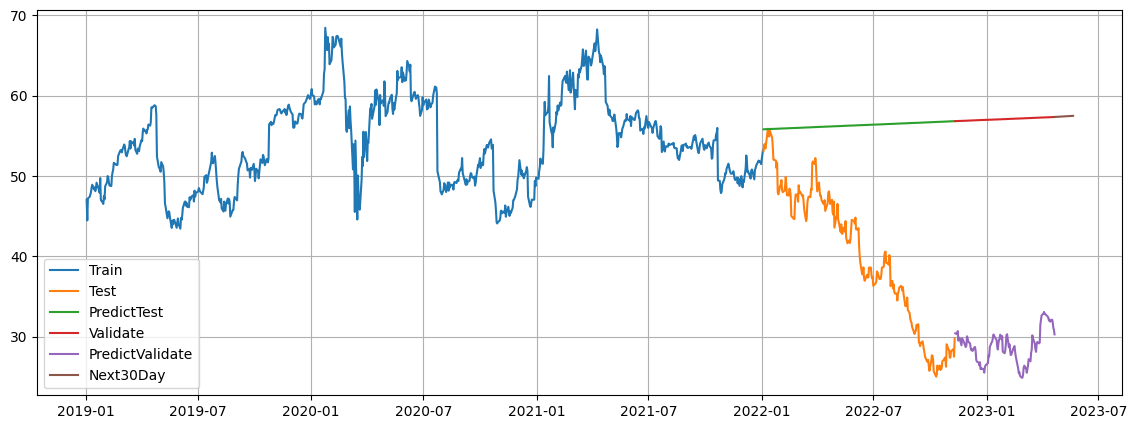

In [ ]:
# Drawing
plt.figure(figsize=(14, 5))
plt.plot(df.index[:train_size], train_data)
plt.plot(df.index[train_size : train_size + test_size], test_data)
plt.plot(df.index[train_size : train_size + test_size], y_pred)
plt.plot(df.index[train_size + test_size :], y_pred_val)
plt.plot(df.index[train_size + test_size :], val_data)
plt.plot(index_next_30_days, y_next_30_days)
plt.legend(['Train', 'Test', 'PredictTest', 'Validate', 'PredictValidate', 'Next30Day'])
plt.grid()
plt.savefig('IS403_SLR_INTC.png')
plt.show()